In [78]:
using Phylo
using PhyloPlot
using CairoMakie

In [79]:
struct Rectangle
    x::Real
    y::Real
    width::Real
    height::Real
end

In [80]:
path = joinpath("..", "assets")
simple = open(t -> parsenewick(t, NamedPolytomousTree), joinpath(path, "simple.tree"))

NamedTree with 5 tips and 1 root. Leaf names are A, B, C, D and G

9 nodes: [A, B, Node 3, C, D, Node 6, Node 7, G and Node 9]

8 branches: [Branch{ManyRoots, String}(5, "Node 7", "Node 3", 0.3), Branch{ManyRoots, String}(4, "Node 6", "D", 0.3), Branch{ManyRoots, String}(6, "Node 7", "Node 6", 0.2), Branch{ManyRoots, String}(7, "Node 9", "G", 0.7), Branch{ManyRoots, String}(2, "Node 3", "A", 0.2), Branch{ManyRoots, String}(8, "Node 9", "Node 7", 0.3), Branch{ManyRoots, String}(3, "Node 6", "C", 0.5) and Branch{ManyRoots, String}(1, "Node 3", "B", 0.3)]

Node records: "A" => Dict{String, Any}() ... "Node 9" => Dict{String, Any}()


In [84]:
using PhyloPlot
using Phylo

#slice and dice tree map
function treemap(tree)
    sizes = subtreesizes(tree, getroot(tree))
    allrects = Dict()
    function sliceanddice(parent, children, depth::Int, rect::Rectangle)
        global progress = 0.0
        for child in children
            # draw horizontal boxes if depth is even otherwise vertical boxes
            if depth % 2 == 0
                w = (sizes[child]/sizes[parent]) * rect.width
                r = Rectangle(rect.x + progress, rect.y, w, rect.height)
                allrects[child] = r
                global progress += w
            else
                h = (sizes[child]/sizes[parent]) * rect.height
                r = Rectangle(rect.x, rect.y+progress, rect.width, h)
                allrects[child] = r
                global progress += h
            end
        end
    end
    function treemap(tree, node, depth)
        if isroot(tree, node)
            allrects[node] = Rectangle(0.0, 0.0, 1.0, 1.0)
        end
        sliceanddice(node, getchildren(tree, node), depth, allrects[node])
        for child in getchildren(tree, node)
            treemap(tree, child, depth+1)
        end
    end
    treemap(tree, getroot(tree), 0)
    return allrects
end



treemap (generic function with 1 method)

In [87]:
rs = treemap(simple)

Dict{Any, Any} with 9 entries:
  "B"      => Rectangle(0.2, 0.0, 0.4, 0.5)
  "A"      => Rectangle(0.6, 0.0, 0.4, 0.5)
  "C"      => Rectangle(0.2, 0.5, 0.4, 0.5)
  "D"      => Rectangle(0.6, 0.5, 0.4, 0.5)
  "Node 9" => Rectangle(0.0, 0.0, 1.0, 1.0)
  "G"      => Rectangle(0.0, 0.0, 0.2, 1.0)
  "Node 3" => Rectangle(0.2, 0.0, 0.8, 0.5)
  "Node 7" => Rectangle(0.2, 0.0, 0.8, 1.0)
  "Node 6" => Rectangle(0.2, 0.5, 0.8, 0.5)

In [92]:
values(rs)

ValueIterator for a Dict{Any, Any} with 9 entries. Values:
  Rectangle(0.2, 0.0, 0.4, 0.5)
  Rectangle(0.6000000000000001, 0.0, 0.4, 0.5)
  Rectangle(0.2, 0.5, 0.4, 0.5)
  Rectangle(0.6000000000000001, 0.5, 0.4, 0.5)
  Rectangle(0.0, 0.0, 1.0, 1.0)
  Rectangle(0.0, 0.0, 0.2, 1.0)
  Rectangle(0.2, 0.0, 0.8, 0.5)
  Rectangle(0.2, 0.0, 0.8, 1.0)
  Rectangle(0.2, 0.5, 0.8, 0.5)

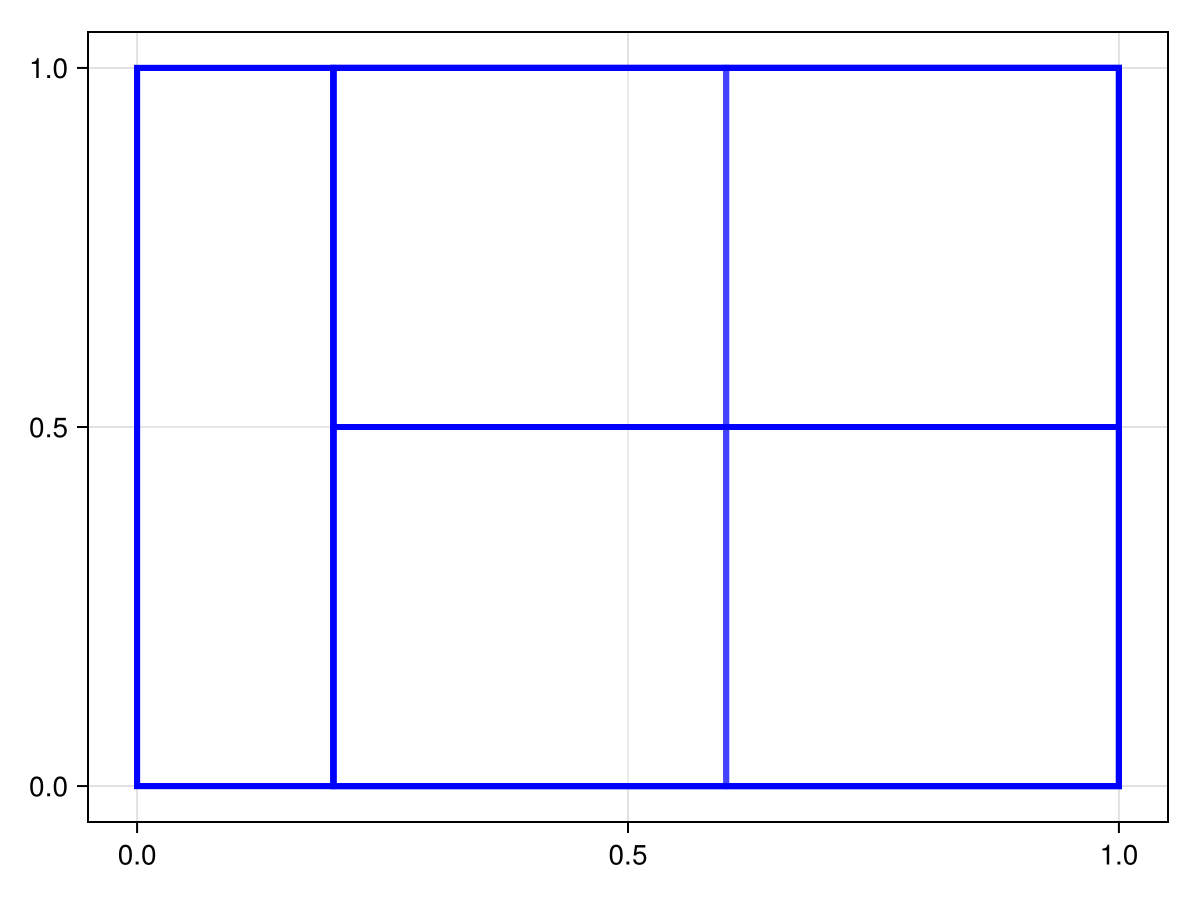

In [113]:
using CairoMakie
using Makie.GeometryBasics

f = Figure()
Axis(f[1, 1])

function draw(rects)
    poly!([Rect(rect.x, rect.y, rect.width, rect.height) for rect in rects],
        strokewidth = 3,
        strokecolor=:blue,
        color=(:white, 0.1),
        colormap=:heat
    )
end

draw(values(rs))

f

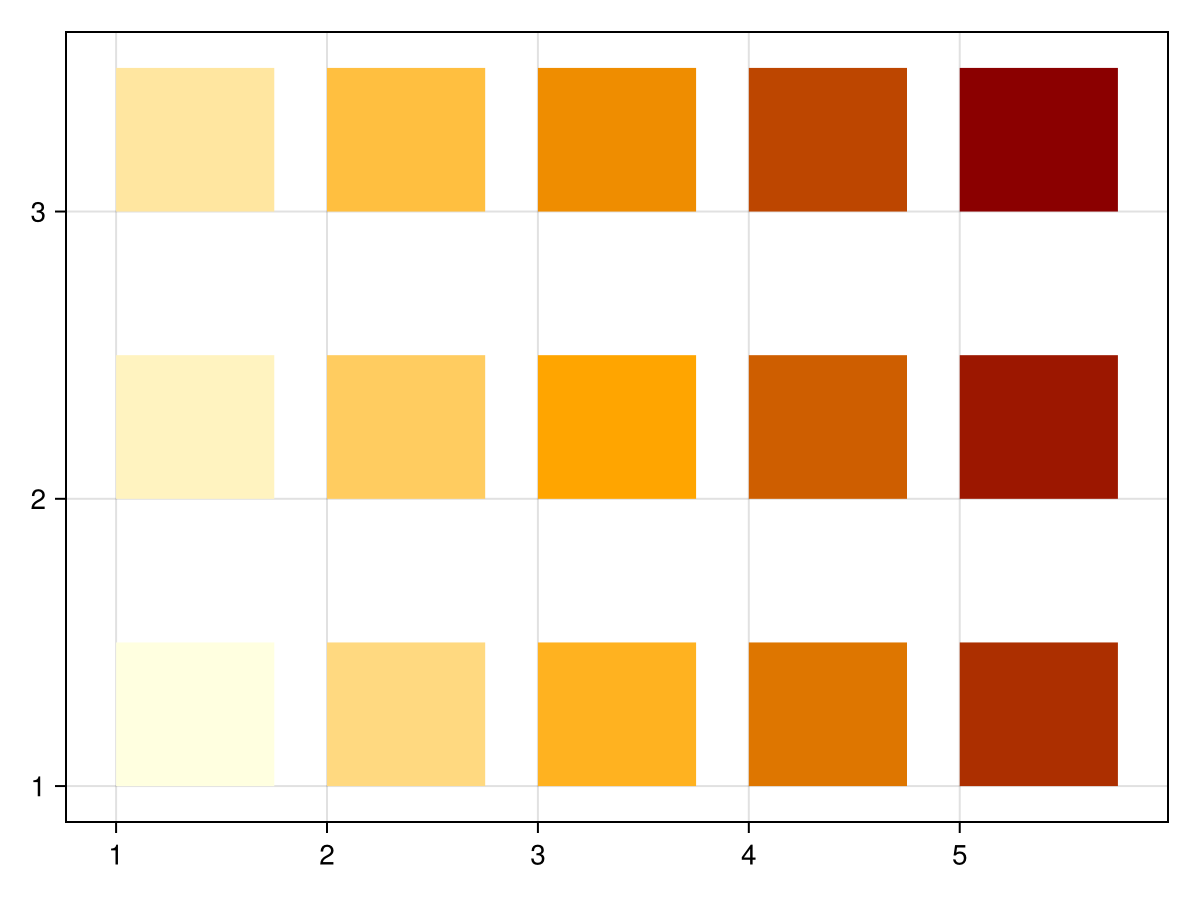

In [102]:
using CairoMakie
using Makie.GeometryBasics


f = Figure()
Axis(f[1, 1])

# vector of shapes
poly!(
    [Rect(i, j, 0.75, 0.5) for i in 1:5 for j in 1:3],
    color = 1:15,
    colormap = :heat
)

f